<a href="https://colab.research.google.com/github/itrinia/code-TA/blob/main/ta_ileene_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kaggle api set up

In [1]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ileenetrinia","key":"952ebd8e75b01c8ce4e3d354d8d22cc6"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d ileenetrinia/docunet-sroie-merged --unzip

Dataset URL: https://www.kaggle.com/datasets/ileenetrinia/docunet-sroie-merged
License(s): other


# load dataset

In [4]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Path to your image folders
sroie_folder = "/content/SROIE2019/train"
docunet_folder = "/content/DocUNet_dataset/image"

# Function to get image files from a folder
def get_images_from_folder(folder_path, valid_extensions=('.jpg', '.png', '.jpeg')):
    image_files = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(valid_extensions):
                image_files.append(os.path.join(root, file))
    return image_files

# Function to create a DataFrame from image files
def create_image_df(image_files):
    data = {
        'filename': [os.path.basename(f) for f in image_files],
        'filepath': image_files,
        'size': [os.path.getsize(f) for f in image_files],
        'dimensions': [Image.open(f).size for f in image_files]
    }
    return pd.DataFrame(data)

# Get image files and create DataFrames
sroie_image_files = get_images_from_folder(sroie_folder)
sroie_df = create_image_df(sroie_image_files)  # Create DataFrame for SROIE

docunet_image_files = get_images_from_folder(docunet_folder)
docunet_df = create_image_df(docunet_image_files) # Create DataFrame for DocUNet


# Now you can use head()
print("SROIE Dataset (Training Images):")
print(sroie_df.head(5))

print("\nDocUNet Dataset (Training Images):")
print(docunet_df.head(5))

SROIE Dataset (Training Images):
           filename                                       filepath    size  \
0  X51005433538.jpg  /content/SROIE2019/train/img/X51005433538.jpg  133776   
1  X51005676543.jpg  /content/SROIE2019/train/img/X51005676543.jpg  396085   
2  X51005719906.jpg  /content/SROIE2019/train/img/X51005719906.jpg  307125   
3  X51005757304.jpg  /content/SROIE2019/train/img/X51005757304.jpg  484462   
4  X51005715451.jpg  /content/SROIE2019/train/img/X51005715451.jpg  383188   

     dimensions  
0  (1080, 1519)  
1   (935, 1970)  
2   (932, 2253)  
3   (703, 1784)  
4   (615, 1491)  

DocUNet Dataset (Training Images):
           filename                                         filepath    size  \
0  103-c395465e.png  /content/DocUNet_dataset/image/103-c395465e.png  481188   
1  110-07c57e2a.png  /content/DocUNet_dataset/image/110-07c57e2a.png  384882   
2  106-a11fe0e9.png  /content/DocUNet_dataset/image/106-a11fe0e9.png  392729   
3   11-8cf5dcd6.png   /content/Doc

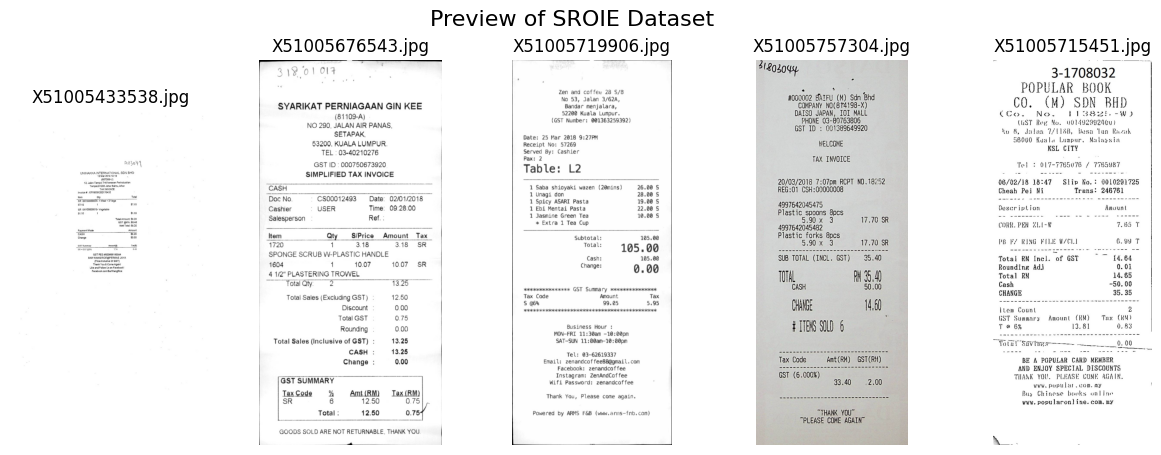

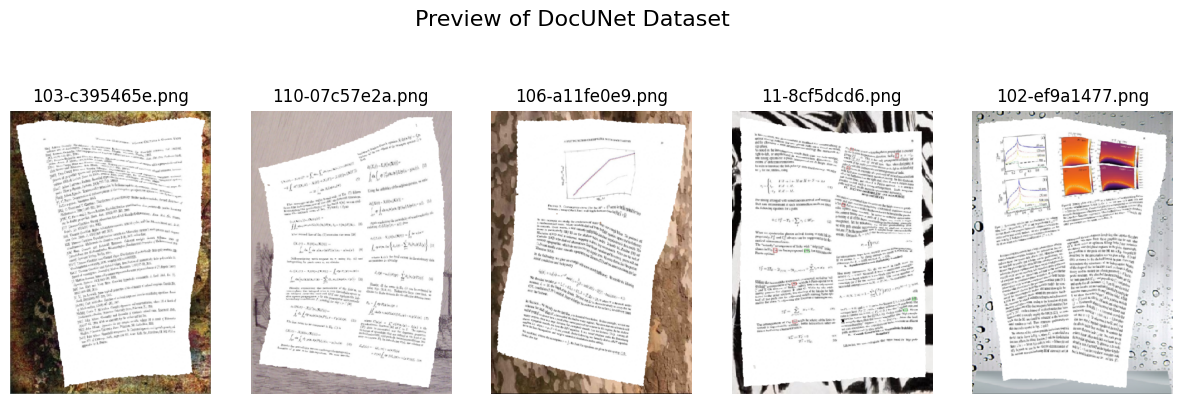

In [6]:
# Display the first 5 images from each dataset
import matplotlib.pyplot as plt
from PIL import Image

# Function to display images
def display_images(df, dataset_name, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(min(num_images, len(df))):
        img_path = df['filepath'].iloc[i]
        try:
            img = Image.open(img_path)
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.title(os.path.basename(img_path))
            plt.axis('off')
        except Exception as e:
            print(f"Error displaying image {img_path}: {e}")
    plt.suptitle(f"Preview of {dataset_name} Dataset", fontsize=16)
    plt.show()

# Display images from SROIE dataset
display_images(sroie_df, "SROIE")

# Display images from DocUNet dataset
display_images(docunet_df, "DocUNet")


## merge dataset sroie & docunet

In [7]:
import random
# Concatenate the two dataframes
merged_df = pd.concat([sroie_df, docunet_df], ignore_index=True)

# Display the first few rows of the merged DataFrame
print("\nMerged Dataset:")
print(merged_df.head(10))

# Shuffle the merged DataFrame
merged_df = merged_df.sample(frac=1, random_state=random.seed(42)).reset_index(drop=True)

# You can now save this merged DataFrame to a CSV file if needed
merged_df.to_csv("merged_dataset.csv", index=False)



Merged Dataset:
           filename                                       filepath     size  \
0  X51005433538.jpg  /content/SROIE2019/train/img/X51005433538.jpg   133776   
1  X51005676543.jpg  /content/SROIE2019/train/img/X51005676543.jpg   396085   
2  X51005719906.jpg  /content/SROIE2019/train/img/X51005719906.jpg   307125   
3  X51005757304.jpg  /content/SROIE2019/train/img/X51005757304.jpg   484462   
4  X51005715451.jpg  /content/SROIE2019/train/img/X51005715451.jpg   383188   
5  X51007846357.jpg  /content/SROIE2019/train/img/X51007846357.jpg  1733021   
6  X51007339131.jpg  /content/SROIE2019/train/img/X51007339131.jpg   555987   
7  X51005444033.jpg  /content/SROIE2019/train/img/X51005444033.jpg   312597   
8  X51005745187.jpg  /content/SROIE2019/train/img/X51005745187.jpg   319969   
9  X51005433494.jpg  /content/SROIE2019/train/img/X51005433494.jpg   194710   

     dimensions  
0  (1080, 1519)  
1   (935, 1970)  
2   (932, 2253)  
3   (703, 1784)  
4   (615, 1491)  
5  (4

In [8]:
print(len(merged_df))

15698


# preprocess image

Processed 500 images
Processed 1000 images
Processed 1500 images
Processed 2000 images
Processed 2500 images
Processed 3000 images
Processed 3500 images
Processed 4000 images
Processed 4500 images
Processed 5000 images
Processed 5500 images
Processed 6000 images
Processed 6500 images
Processed 7000 images
Processed 7500 images
Processed 8000 images
Processed 8500 images
Processed 9000 images
Processed 9500 images
Processed 10000 images
Processed 10500 images
Processed 11000 images
Processed 11500 images
Processed 12000 images
Processed 12500 images
Processed 13000 images
Processed 13500 images
Processed 14000 images
Processed 14500 images
Processed 15000 images
Processed 15500 images
  original_filename                                original_filepath  \
0  104-d0d6cac9.png  /content/DocUNet_dataset/image/104-d0d6cac9.png   
1   11-ff658693.png   /content/DocUNet_dataset/image/11-ff658693.png   
2   11-005b8551.png   /content/DocUNet_dataset/image/11-005b8551.png   
3  103-e13eed8a.png

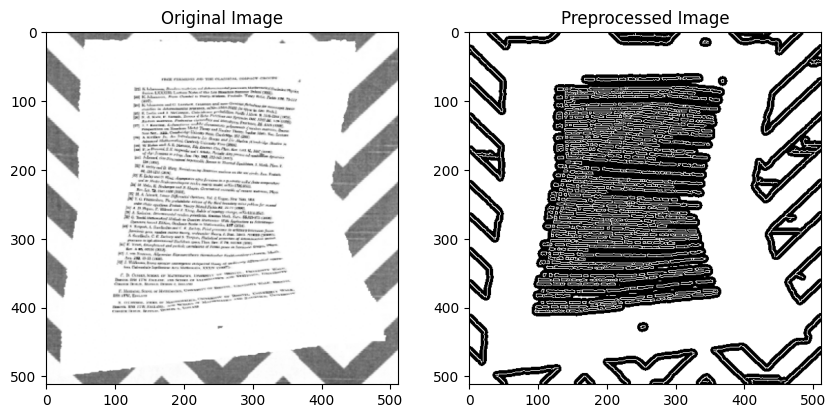

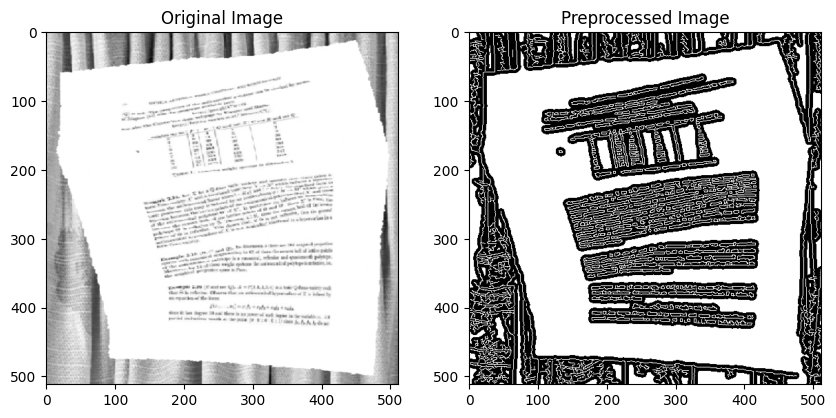

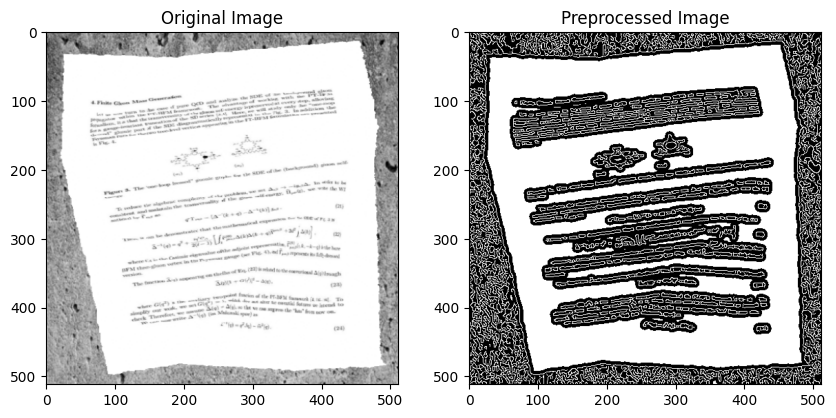

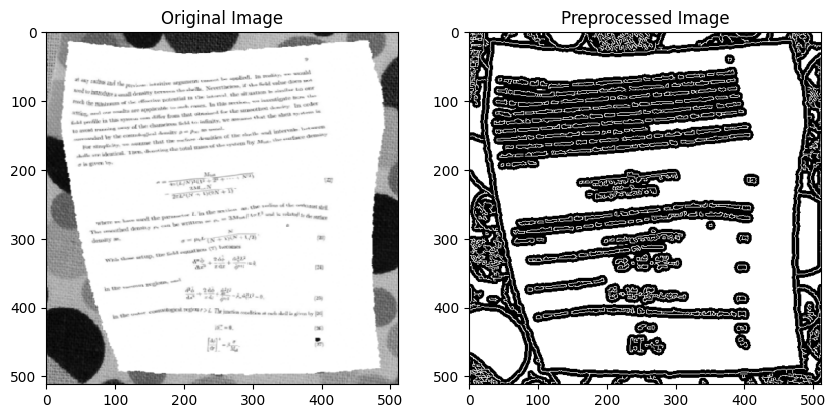

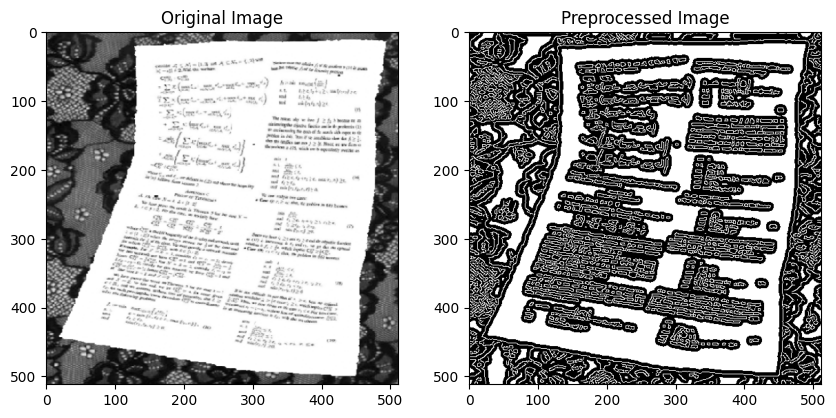

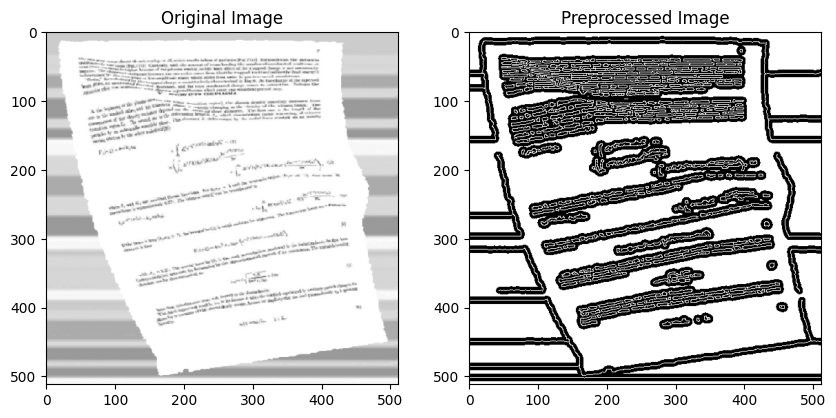

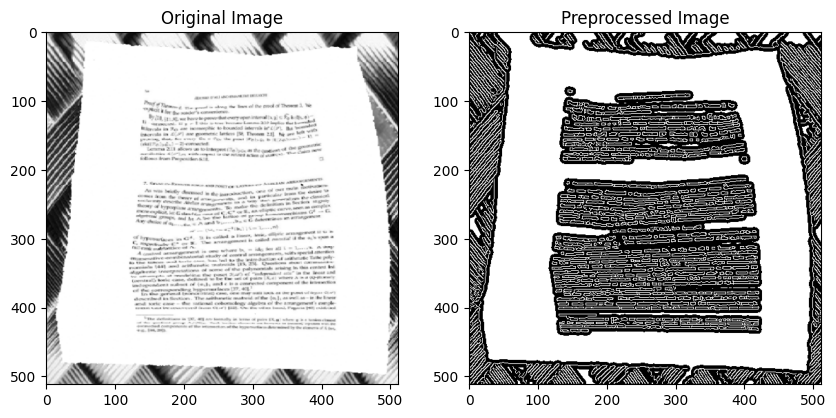

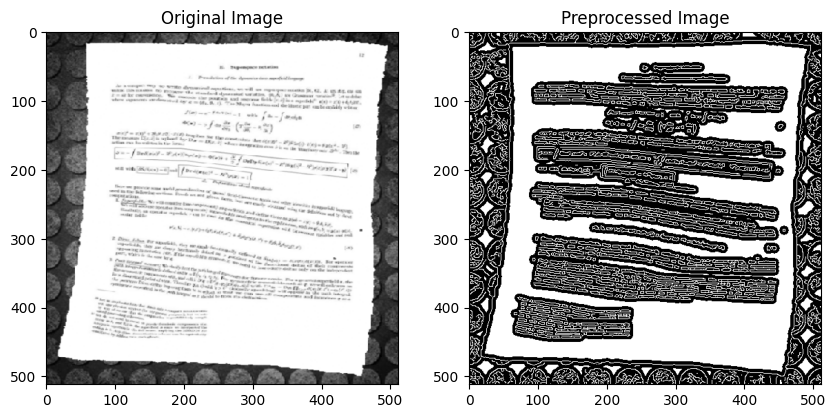

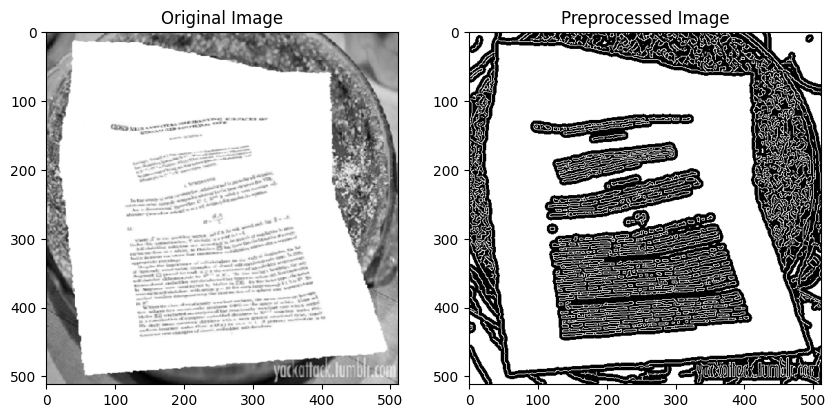

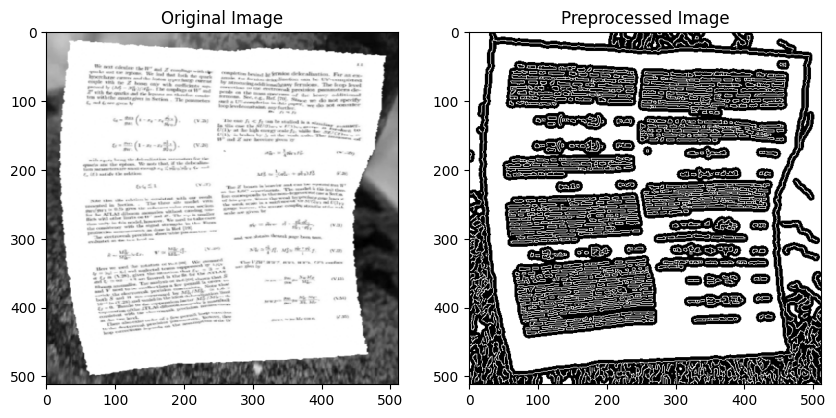

In [9]:
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

def preprocess_image(image_path, save_dir):
    # Load the image using OpenCV
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 512x512
    img = cv2.resize(img, (512, 512))

    # Normalize to [0, 1]
    img = img / 255.0

    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply(np.uint8(img * 255))
    img = img / 255.0

    # Denoising (Gaussian blur)
    img = cv2.GaussianBlur(img, (5, 5), 0)

    # Edge Detection (Canny)
    img = cv2.Canny(np.uint8(img * 255), 50, 150)
    img = img / 255.0

    # Binarization (Adaptive Thresholding)
    img = cv2.adaptiveThreshold(np.uint8(img*255), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY, 11, 2)
    img = img / 255.0

    # Create filename based on original filename
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)

    # Save only the final preprocessed image
    output_filename = f"{name}_preprocessed{ext}"
    cv2.imwrite(os.path.join(save_dir, output_filename), img*255)

    return img, output_filename

# Create the directory for preprocessed images
save_dir = "preprocessed_dataset"
os.makedirs(save_dir, exist_ok=True)

# Preprocess images and store information in preprocessed_df
preprocessed_data = []
for i in range(len(merged_df)):
    image_path = merged_df['filepath'][i]
    img, output_filename = preprocess_image(image_path, save_dir)

    preprocessed_data.append([
        merged_df['filename'][i],
        merged_df['filepath'][i],
        output_filename
    ])

    if (i + 1) % 500 == 0:
        print(f"Processed {i + 1} images")

# Create the preprocessed_df DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data,
                              columns=['original_filename', 'original_filepath', 'preprocessed_filename'])
preprocessed_df['preprocessed_filepath'] = preprocessed_df['preprocessed_filename'].apply(
    lambda x: os.path.join(save_dir, x))

print(preprocessed_df.head())

# --- Show the Visualization ---
for i in range(10):
    image_path = merged_df['filepath'][i]
    original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    original_img = cv2.resize(original_img, (512, 512))
    preprocessed_img, _ = preprocess_image(image_path, save_dir)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed_img, cmap='gray')
    plt.title('Preprocessed Image')

    plt.show()

In [14]:
# import cv2
# import numpy as np
# from skimage import exposure

# def preprocess_image(image_path, save_dir): # Add save_dir as an argument
#     # Load the image using OpenCV
#     img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#     # Resize the image to 512x512
#     img = cv2.resize(img, (512, 512))

#     # Normalize to [0, 1]
#     img = img / 255.0

#     # CLAHE (Contrast Limited Adaptive Histogram Equalization)
#     clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#     img_clahe = clahe.apply(np.uint8(img * 255))
#     img_clahe = img_clahe / 255.0

#     # Denoising (Gaussian blur)
#     img_denoised = cv2.GaussianBlur(img_clahe, (5, 5), 0)

#     # Edge Detection (Canny)
#     img_edges = cv2.Canny(np.uint8(img_denoised * 255), 50, 150)
#     img_edges = img_edges / 255.0

#     # Binarization (Adaptive Thresholding)
#     img_binary = cv2.adaptiveThreshold(np.uint8(img_denoised*255), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
#     img_binary = img_binary / 255.0

#     # Create filename based on original filename
#     filename = os.path.basename(image_path)
#     name, ext = os.path.splitext(filename)

#     # Save preprocessed images to the directory
#     cv2.imwrite(os.path.join(save_dir, f"{name}_original{ext}"), img*255)
#     cv2.imwrite(os.path.join(save_dir, f"{name}_clahe{ext}"), img_clahe*255)
#     cv2.imwrite(os.path.join(save_dir, f"{name}_denoised{ext}"), img_denoised*255)
#     cv2.imwrite(os.path.join(save_dir, f"{name}_edges{ext}"), img_edges*255)
#     cv2.imwrite(os.path.join(save_dir, f"{name}_binary{ext}"), img_binary*255)

#     return img, img_clahe, img_denoised, img_edges, img_binary, f"{name}_original{ext}", f"{name}_clahe{ext}", f"{name}_denoised{ext}", f"{name}_edges{ext}", f"{name}_binary{ext}"


# # Create the directory for preprocessed images
# save_dir = "preprocessed_dataset"
# os.makedirs(save_dir, exist_ok=True)

# # Preprocess images and store information in preprocessed_df
# preprocessed_data = []
# for i in range(len(merged_df)):
#     image_path = merged_df['filepath'][i]
#     results = preprocess_image(image_path, save_dir) # Pass save_dir to the function

#     preprocessed_data.append([merged_df['filename'][i], merged_df['filepath'][i]] + list(results[5:]))

#     if (i + 1) % 100 == 0:
#         print(f"Processed {i + 1} images")

# # Create the preprocessed_df DataFrame
# preprocessed_df = pd.DataFrame(preprocessed_data, columns=['original_filename', 'original_filepath', 'original', 'clahe', 'denoised', 'edges', 'binary'])
# preprocessed_df['filepath'] = preprocessed_df['original'].apply(lambda x: os.path.join(save_dir, x))

# print(preprocessed_df.head())

# # --- Show the Visualization ---
# for i in range(10):
#     image_path = merged_df['filepath'][i]
#     original_img, img_clahe, img_denoised, img_edges, img_binary, *_  = preprocess_image(image_path, save_dir)  # Pass save_dir to the function

#     plt.figure(figsize=(15, 10))

#     plt.subplot(2, 3, 1)
#     plt.imshow(original_img, cmap='gray')
#     plt.title('Original Image')

#     plt.subplot(2, 3, 2)
#     plt.imshow(img_clahe, cmap='gray')
#     plt.title('CLAHE Enhanced')

#     plt.subplot(2, 3, 3)
#     plt.imshow(img_denoised, cmap='gray')
#     plt.title('Denoised Image')

#     plt.subplot(2, 3, 4)
#     plt.imshow(img_edges, cmap='gray')
#     plt.title('Edge Detection')

#     plt.subplot(2, 3, 5)
#     plt.imshow(img_binary, cmap='gray')
#     plt.title('Binarized Image')

#     plt.show()

In [13]:
import os
from PIL import Image

preprocessed_image_dir = "preprocessed_dataset"

# Function to get image files from a folder
def get_images_from_folder(folder_path):
    image_files = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.png', '.jpeg')):
                image_files.append(os.path.join(root, file))
    return image_files


preprocessed_images = get_images_from_folder(preprocessed_image_dir)

print(f"Number of preprocessed images: {len(preprocessed_images)}")

for image_path in preprocessed_images[:5]:  # Check the shape of the first 5 images
    try:
      img = Image.open(image_path)
      width, height = img.size
      print(f"Image: {image_path}, Shape: ({width}, {height})")
    except Exception as e:
      print(f"Error processing {image_path}: {e}")


Number of preprocessed images: 78490
Image: preprocessed_dataset/102-b8b21b54_edges.png, Shape: (512, 512)
Image: preprocessed_dataset/107-08f39100_original.png, Shape: (512, 512)
Image: preprocessed_dataset/103-04b339ba_denoised.png, Shape: (512, 512)
Image: preprocessed_dataset/108-fdbbf595_clahe.png, Shape: (512, 512)
Image: preprocessed_dataset/109-1da9dec9_original.png, Shape: (512, 512)


# splitting dataset

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to load images from filepaths
# def load_images(filepaths, img_size=(512, 512)):
#     images = []
#     for path in filepaths:
#         img = load_img(path, target_size=img_size)
#         img_array = img_to_array(img) / 255.0
#         images.append(img_array)
#     return np.array(images)

# Split full dataset
train_df, temp_df = train_test_split(final_df, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Load image arrays
X_train = load_images(train_df["filepath"].values)
X_val = load_images(val_df["filepath"].values)
X_test = load_images(test_df["filepath"].values)

# use the same images as "targets" because it's an autoencoder
y_train = X_train.copy()
y_val = X_val.copy()
y_test = X_test.copy()

AttributeError: module 'numpy' has no attribute 'dtypes'

# image augmentation

In [ ]:
!pip install imgaug

In [ ]:
!pip install numpy==1.24.3
!pip install imgaug --upgrade

In [ ]:

np.__version__


'1.24.3'

Augmenting images: 100%|██████████| 3139/3139 [01:34<00:00, 33.28it/s]


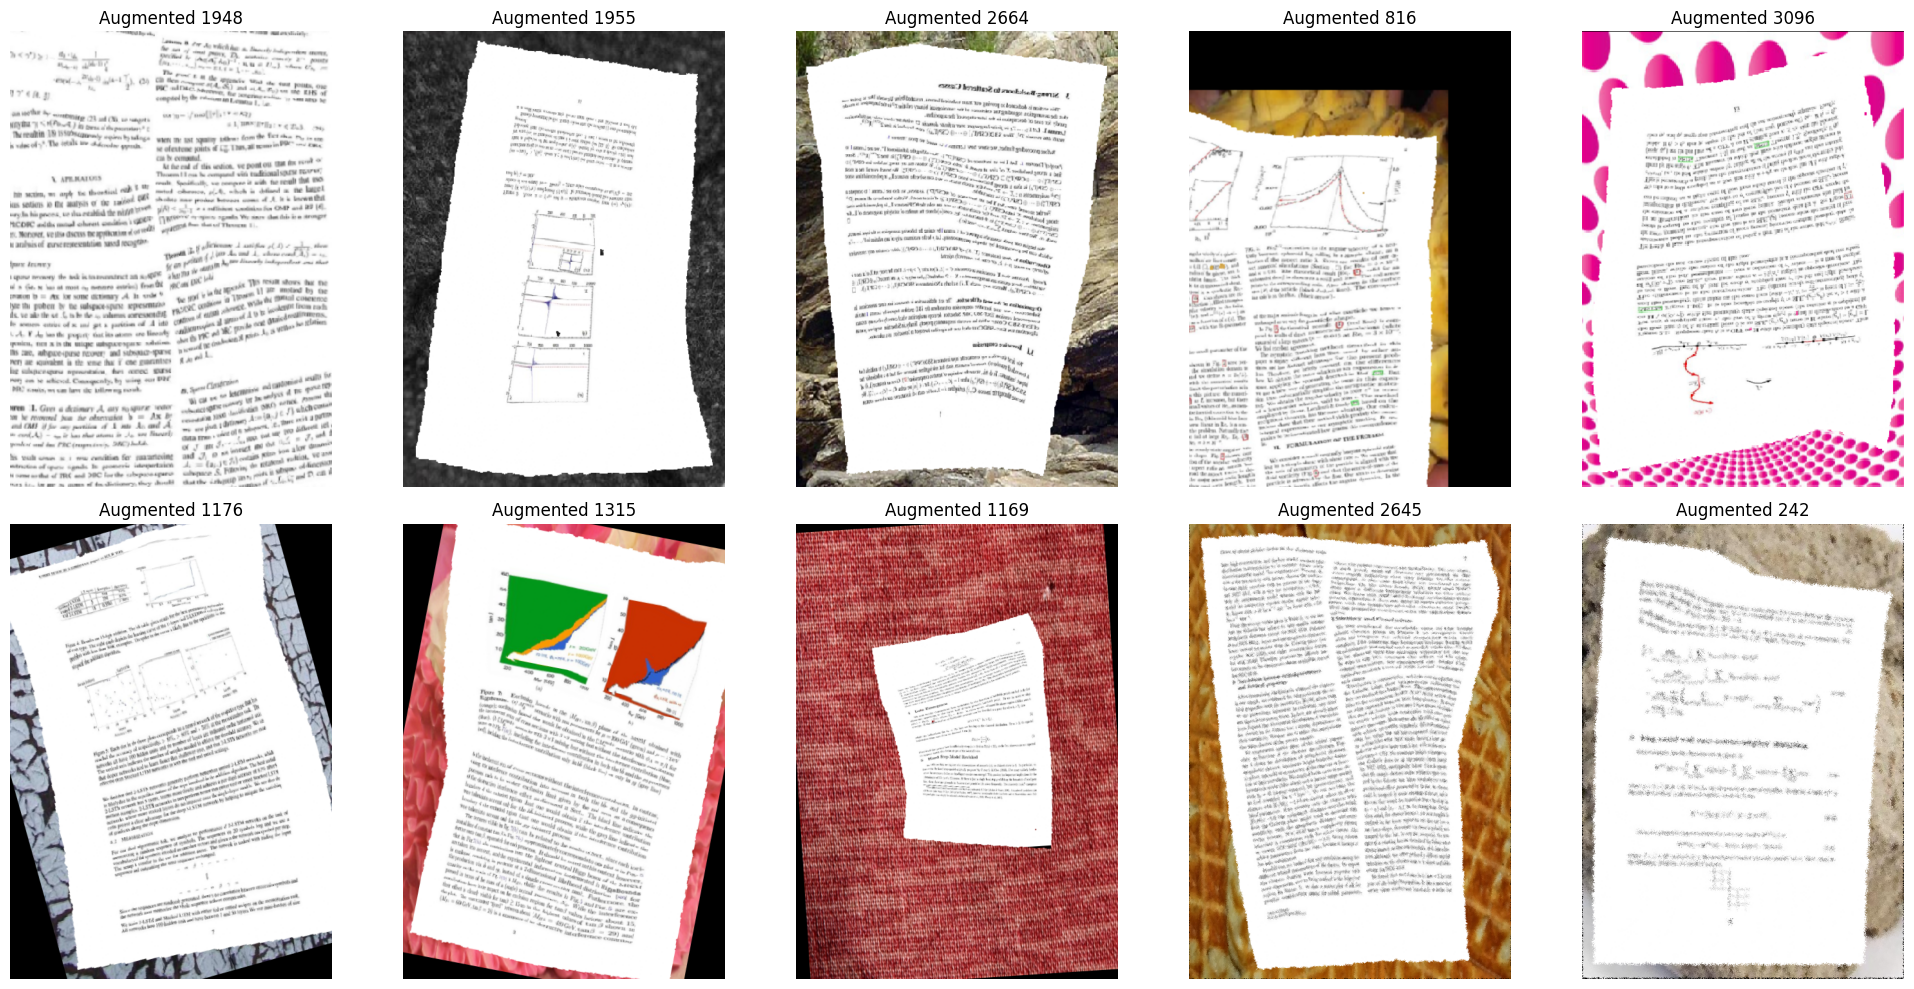

In [ ]:
import cv2
import numpy as np
import imgaug.augmenters as iaa
from tqdm import tqdm
from multiprocessing import Pool, cpu_count
import random
import pandas as pd
import os

# Define individual augmentations
augmentations = [
    iaa.Affine(rotate=(-30, 30)),
    iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}),
    iaa.Affine(scale=(0.5, 1.5)),
    iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25),
    iaa.Fliplr(1.0),
    iaa.Flipud(1.0)
]

# Function to process a single image with a single random augmentation
def augment_image(args):
    idx, filepath, save_dir = args
    image = cv2.imread(filepath)
    if image is None:
        return None

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    aug = random.choice(augmentations)
    augmented_image = aug(image=image)

    output_path = f"{save_dir}/aug_{idx}.jpg"
    cv2.imwrite(output_path, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))
    return augmented_image

# Parallel augmentation
def parallel_augment(merged_df, num_images_to_augment=3139, save_dir="augmented"):
    os.makedirs(save_dir, exist_ok=True)

    # Randomly sample indices
    random_indices = random.sample(range(len(merged_df)), num_images_to_augment)
    filepaths = merged_df['filepath'].iloc[random_indices].tolist()

    # Prepare arguments for multiprocessing
    args_list = [(i, fp, save_dir) for i, fp in enumerate(filepaths)]

    # Use all available CPU cores
    with Pool(processes=cpu_count()) as pool:
        results = list(tqdm(
            pool.imap(augment_image, args_list),
            total=num_images_to_augment,
            desc="Augmenting images"
        ))

    return [img for img in results if img is not None]  # Filter out None results


if __name__ == "__main__":
    merged_df = pd.read_csv("merged_dataset.csv")

    # Run parallel augmentation
    augmented_images = parallel_augment(merged_df, num_images_to_augment=3139)

    # Preview some augmented images
    import matplotlib.pyplot as plt
    preview_indices = random.sample(range(len(augmented_images)), min(10, len(augmented_images)))
    plt.figure(figsize=(20, 10))
    for i, idx in enumerate(preview_indices):
        plt.subplot(2, 5, i+1)
        plt.imshow(augmented_images[idx])
        plt.title(f"Augmented {idx}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd

# create new df
augmented_df = pd.DataFrame({
    'filepath': [f'/content/augmented/aug_{i}.jpg' for i in range(len(augmented_images))],
    'source': 'augmented'
})

# Concatenate the original DataFrame with the new DataFrame
final_df = pd.concat([merged_df, augmented_df], ignore_index=True)

print(final_df.head())
print(final_df.tail())
print(len(final_df))


           filename                                         filepath  \
0  104-166d75df.png  /content/DocUNet_dataset/image/104-166d75df.png   
1  102-0a8d021e.png  /content/DocUNet_dataset/image/102-0a8d021e.png   
2  107-f5d35fe0.png  /content/DocUNet_dataset/image/107-f5d35fe0.png   
3  105-c419e019.png  /content/DocUNet_dataset/image/105-c419e019.png   
4  103-0a4c28a1.png  /content/DocUNet_dataset/image/103-0a4c28a1.png   

       size  dimensions source  
0  421092.0  (500, 707)    NaN  
1  647087.0  (500, 707)    NaN  
2  362682.0  (500, 707)    NaN  
3  436856.0  (500, 707)    NaN  
4  331071.0  (500, 707)    NaN  
      filename                         filepath  size dimensions     source
18832      NaN  /content/augmented/aug_3134.jpg   NaN        NaN  augmented
18833      NaN  /content/augmented/aug_3135.jpg   NaN        NaN  augmented
18834      NaN  /content/augmented/aug_3136.jpg   NaN        NaN  augmented
18835      NaN  /content/augmented/aug_3137.jpg   NaN        NaN 

In [ ]:
len(final_df)

NameError: name 'final_df' is not defined

In [ ]:
print(final_df.columns)
final_df.head()


Index(['filename', 'filepath', 'size', 'dimensions', 'source'], dtype='object')


filename                                         filepath  \
0  104-166d75df.png  /content/DocUNet_dataset/image/104-166d75df.png   
1  102-0a8d021e.png  /content/DocUNet_dataset/image/102-0a8d021e.png   
2  107-f5d35fe0.png  /content/DocUNet_dataset/image/107-f5d35fe0.png   
3  105-c419e019.png  /content/DocUNet_dataset/image/105-c419e019.png   
4  103-0a4c28a1.png  /content/DocUNet_dataset/image/103-0a4c28a1.png   

       size  dimensions source  
0  421092.0  (500, 707)    NaN  
1  647087.0  (500, 707)    NaN  
2  362682.0  (500, 707)    NaN  
3  436856.0  (500, 707)    NaN  
4  331071.0  (500, 707)    NaN

# define model

In [ ]:
!pip install --upgrade jax
!pip install --upgrade tensorflow
!pip install ml_dtypes==0.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.1 MB/s eta 0:00:00
  Attempting uninstall: ml_dtypes
    Found existing installation: ml_dtypes 0.5.1
    Uninstalling ml_dtypes-0.5.1:
      Successfully uninstalled ml_dtypes-0.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires ml-dtypes<1.0.0,>=0.5.1, but you have ml-dtypes 0.2.0 which is incompatible.
jax 0.5.3 requires ml_dtypes>=0.4.0, but you have ml-dtypes 0.2.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
tensorstore 0.1.73 requires ml_dtypes>=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Activation, Multiply, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import Mean
from tensorflow.image import ssim, psnr
import numpy as np
import cv2

/usr/local/lib/python3.11/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.5.1 is installed, but it is not compatible with the installed jaxlib version 0.5.3, so it will not be used.
  warnings.warn(


In [ ]:
# Define the residual block
def residual_block(x, filters):
    # First convolution layer
    conv1 = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    conv1 = Activation('relu')(conv1)

    # Second convolution layer
    conv2 = Conv2D(filters, kernel_size=(3, 3), padding='same')(conv1)
    conv2 = Activation('relu')(conv2)

    # Skip connection
    skip = Add()([x, conv2])
    return skip

# Define the attention mechanism
def attention_block(x, g, filters):
    # Query and Key
    theta_x = Conv2D(filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    phi_g = Conv2D(filters, kernel_size=(1, 1), strides=(1, 1), padding='same')(g)

    # Add and apply ReLU
    add_xg = Add()([theta_x, phi_g])
    add_xg = Activation('relu')(add_xg)

    # Attention map
    psi = Conv2D(1, kernel_size=(1, 1), strides=(1, 1), padding='same')(add_xg)
    psi = Activation('sigmoid')(psi)

    # Apply attention
    return Multiply()([x, psi])


# Define the DocUNet model
def build_docunet(input_shape=(512, 512, 1)):
    inputs = Input(input_shape)

    # Encoder
    x = Conv2D(64, kernel_size=(3, 3), padding='same')(inputs)
    x = Activation('relu')(x)
    x = residual_block(x, 64)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, kernel_size=(3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = residual_block(x, 128)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(256, kernel_size=(3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = residual_block(x, 256)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(512, kernel_size=(3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = residual_block(x, 512)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Bottleneck with attention mechanism
    g = Conv2D(512, kernel_size=(3, 3), padding='same')(x)
    g = Activation('relu')(g)
    g = attention_block(g, x, 512)

    # Decoder
    x = Conv2DTranspose(512, kernel_size=(3, 3), strides=(2, 2), padding='same')(g)
    x = concatenate([x, residual_block(x, 512)])
    x = Activation('relu')(x)

    x = Conv2DTranspose(256, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = concatenate([x, residual_block(x, 256)])
    x = Activation('relu')(x)

    x = Conv2DTranspose(128, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = concatenate([x, residual_block(x, 128)])
    x = Activation('relu')(x)

    x = Conv2DTranspose(64, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = concatenate([x, residual_block(x, 64)])
    x = Activation('relu')(x)

    # Output layer
    outputs = Conv2D(1, kernel_size=(1, 1), activation='sigmoid')(x)

    # Build the model
    model = Model(inputs, outputs)
    return model

# Compile the model
model = build_docunet()
model.compile(optimizer=Adam(learning_rate=1e-4), loss=MeanSquaredError())

# Print model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 512, 512, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 512, 512, 64)   │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 512, 512, 64)   │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 512, 512, 64)   │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 512, 512, 64)   │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 512, 512, 64)   │         36,928 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 512, 512, 64)   │              0 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 512, 512, 64)   │              0 │ activation[0][0],      │
│                           │                        │                │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 256, 256, 64)   │              0 │ add[0][0]              │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 256, 256, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 256, 256, 128)  │              0 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 256, 256, 128)  │        147,584 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activation) │ (None, 256, 256, 128)  │              0 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 256, 256, 128)  │        147,584 │ activation_4[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_5 (Activation) │ (None, 256, 256, 128)  │              0 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 256, 256, 128)  │              0 │ activation_3[0][0],    │
│                           │                        │                │ activation_5[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 128, 128, 128)  │              0 │ add_1[0][0]            │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)    

 Total params: 22,430,018 (85.56 MB)

 Trainable params: 22,430,018 (85.56 MB)

 Non-trainable params: 0 (0.00 B)

# running model

In [ ]:
import tensorflow as tf
from tensorflow.image import ssim, psnr

epochs = 20
batch_size = 16

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")

    # Shuffle training data
    indices = np.arange(X_train.shape[0])
    np.random.shuffle(indices)
    X_train = X_train[indices]
    y_train = y_train[indices]

    # Train in batches
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]
        model.train_on_batch(X_batch, y_batch)

Epoch 1/20


NameError: name 'X_train' is not defined

# eval model

In [ ]:
val_loss = model.evaluate(X_val, y_val, batch_size=batch_size, verbose=0)
print(f"Validation Loss: {val_loss}")

test_loss = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print(f"Test Loss: {test_loss}")

y_test_pred = model.predict(X_test, batch_size=batch_size)
test_ssim = tf.reduce_mean(ssim(y_test, y_test_pred, max_val=1.0))
test_psnr = tf.reduce_mean(psnr(y_test, y_test_pred, max_val=1.0))
print(f"Test SSIM: {test_ssim.numpy()}, Test PSNR: {test_psnr.numpy()}")

# save model

In [ ]:
model.save("ta_ileene.h5")